In [34]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [35]:
train = pd.read_csv('../project_2/datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

pd.options.display.max_rows = 100
pd.options.display.max_columns = None

In [36]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [37]:
train.isnull().sum().sort_values(ascending=False)

Pool QC            2042
Misc Feature       1986
Alley              1911
Fence              1651
Fireplace Qu       1000
Lot Frontage        330
Garage Finish       114
Garage Qual         114
Garage Yr Blt       114
Garage Cond         114
Garage Type         113
Bsmt Exposure        58
BsmtFin Type 2       56
BsmtFin Type 1       55
Bsmt Cond            55
Bsmt Qual            55
Mas Vnr Area         22
Mas Vnr Type         22
Bsmt Half Bath        2
Bsmt Full Bath        2
Garage Area           1
Total Bsmt SF         1
Bsmt Unf SF           1
BsmtFin SF 2          1
BsmtFin SF 1          1
Garage Cars           1
Mo Sold               0
Sale Type             0
Full Bath             0
Half Bath             0
Bedroom AbvGr         0
Kitchen AbvGr         0
Kitchen Qual          0
Yr Sold               0
Misc Val              0
Pool Area             0
Screen Porch          0
TotRms AbvGrd         0
Functional            0
Fireplaces            0
3Ssn Porch            0
Enclosed Porch  

In [38]:
test.isnull().sum().sort_values(ascending=False)

Pool QC            874
Misc Feature       837
Alley              820
Fence              706
Fireplace Qu       422
Lot Frontage       160
Garage Yr Blt       45
Garage Finish       45
Garage Qual         45
Garage Cond         45
Garage Type         44
BsmtFin Type 1      25
Bsmt Qual           25
Bsmt Cond           25
Bsmt Exposure       25
BsmtFin Type 2      25
Electrical           1
Mas Vnr Type         1
Mas Vnr Area         1
Kitchen AbvGr        0
TotRms AbvGrd        0
Bedroom AbvGr        0
Half Bath            0
Full Bath            0
Bsmt Half Bath       0
Bsmt Full Bath       0
Gr Liv Area          0
Kitchen Qual         0
Id                   0
Functional           0
Fireplaces           0
2nd Flr SF           0
Garage Cars          0
Garage Area          0
Paved Drive          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold    

In [39]:
train['Garage Area'].fillna(value=0)
train['Lot Frontage'] = train['Lot Frontage'].fillna(train['Lot Frontage'].median())

In [40]:
# check if there are any duplicate values for Id and parcel_id before dropping
# train.parcel_id.duplicated().sum()
# train.Id.duplicated().sum()
# confirmed that there are 0 duplicates

train.drop("PID", axis = 1, inplace = True)
train.drop("Id", axis = 1, inplace = True)

test.drop("PID", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [41]:
def rename_cols(df):
     df.rename(index=str, columns={
    'PID': 'parcel_id',
    'MS SubClass' : 'ms_subclass',
    'MS Zoning': 'zoning', 
    'Lot Frontage': 'lot_frontage',
    'Lot Area': 'lot_sq_ft',
    'Street': 'paved_street', 
    'Alley': 'alley', 
    'Lot Shape': 'lot_shape', 
    'Land Contour': 'flatness', 
    'Utilities': 'utilities',       
    'Lot Config': 'lot_config', 
    'Land Slope': 'land_slope', 
    'Neighborhood': 'neighborhood', 
    'Condition 1': 'proximity_1',
    'Condition 2': 'proximity_2', 
    'Bldg Type': 'building_type', 
    'House Style': 'style', 
    'Overall Qual': 'quality_rating',
    'Overall Cond': 'condition_rating', 
    'Year Built': 'year_built', 
    'Year Remod/Add': 'year_renovation', 
    'Roof Style': 'roof_style',
    'Roof Matl': 'roof_material', 
    'Exterior 1st': 'exterior_1', 
    'Exterior 2nd': 'exterior_2', 
    'Mas Vnr Type': 'masonry_type',
    'Mas Vnr Area': 'masonry_area', 
    'Exter Qual': 'exterior_quality', 
    'Exter Cond': 'exterior_condition', 
    'Foundation': 'foundation_type', 
    'Bsmt Qual': 'basement_height',
    'Bsmt Cond': 'basement_condition', 
    'Bsmt Exposure': 'basement_exposure', 
    'BsmtFin Type 1': 'basement_finished_condition', 
    'BsmtFin SF 1': 'basement_fin_sqft',
    'BsmtFin Type 2': 'basement_2_condition', 
    'BsmtFin SF 2': 'basement_2_sqft', 
    'Bsmt Unf SF': 'unfinished_basement_sqft', 
    'Total Bsmt SF': 'total_basement_sqft',
    'Heating': 'heating_type', 
    'Heating QC': 'heating_quality', 
    'Central Air': 'has_central_air', 
    'Electrical': 'electrical', 
    '1st Flr SF': 'first_fl_sqft',
    '2nd Flr SF': 'second_fl_sqft', 
    'Low Qual Fin SF': 'low_quality_sqft', 
    'Gr Liv Area': 'living_area_sqft', 
    'Bsmt Full Bath': 'basement_full_bath',
    'Bsmt Half Bath': 'basement_half_bath', 
    'Full Bath': 'full_bath', 
    'Half Bath': 'half_bath', 
    'Bedroom AbvGr': 'bedrooms',
    'Kitchen AbvGr': 'kitchens', 
    'Kitchen Qual': 'kitchen_quality', 
    'TotRms AbvGrd': 'total_rooms(non-bath_or_basement)', 
    'Functional': 'functionality',
    'Fireplaces': 'fireplaces', 
    'Fireplace Qu': 'fireplace_quality', 
    'Garage Type': 'garage_type', 
    'Garage Yr Blt': 'garage_year',
    'Garage Finish': 'garage_finish', 
    'Garage Cars': 'garage_size', 
    'Garage Area': 'garage_sqft', 
    'Garage Qual': 'garage_quality',
    'Garage Cond': 'garage_condition', 
    'Paved Drive': 'has_paved_driveway', 
    'Wood Deck SF': 'deck_sqft', 
    'Open Porch SF': 'open_porch_sqft',
    'Enclosed Porch': 'enclosed_porch_sqft', 
    '3Ssn Porch': 'seasonal_porch_sqft', 
    'Screen Porch': 'screen_porch_sqft', 
    'Pool Area': 'pool_size', 
    'Pool QC': 'pool_quality',
    'Fence': 'fence_quality', 
    'Misc Feature': 'misc_feature',
    'Misc Val': 'misc_value',
    'Mo Sold': 'month_sold', 
    'Yr Sold': 'year_sold', 
    'Sale Type': 'sale_type', 
    'SalePrice': 'price'

    
}, inplace=True)
        

In [42]:
train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,68.0,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [43]:
test.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [44]:
#check if Total BSMT SF = Bsmt Unf SF + BsmtFin SF 1 + BsmtFin SF 2
#train['bsmt_total_check'] = train['Total Bsmt SF'] == train['Bsmt Unf SF'] + train['BsmtFin SF 1'] + train['BsmtFin SF 2']
# confirmed it is correct, hence we can drop the 3 columns
#train['bsmt_total_check'].sum()

train.drop(['Bsmt Unf SF','BsmtFin SF 1','BsmtFin SF 2'], axis = 1, inplace = True)
test.drop(['Bsmt Unf SF','BsmtFin SF 1','BsmtFin SF 2'], axis = 1, inplace = True)

In [45]:
#do the same for 1st Flr SF and 2nd flr SF
#train['gr_area_check'] = train['Gr Liv Area'] == train['1st Flr SF'] + train['2nd Flr SF'] + train['Low Qual Fin SF']
#confirmed it is correct, proceed to also drop the 3 columns
#train['gr_area_check'].sum()
#train.drop(['1st Flr SF','2nd Flr SF','Low Qual Fin SF'], axis = 1, inplace = True)
#test.drop(['1st Flr SF','2nd Flr SF','Low Qual Fin SF'], axis = 1, inplace = True)

In [46]:
#create a new column for house age
train['house_age'] = train['Yr Sold'] - train['Year Built']
test['house_age'] = train['Yr Sold'] - train['Year Built']

In [47]:
train['house_age'].dtype

dtype('int64')

In [48]:
train.tail()

#total 2050 entries

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,house_age
2046,20,RL,79.0,11449,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1884.0,GasA,Ex,Y,SBrkr,1728,0,0,1728,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2007.0,Fin,2.0,520.0,TA,TA,Y,0,276,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,298751,1
2047,30,RL,68.0,12342,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,Unf,861.0,GasA,Ex,Y,SBrkr,861,0,0,861,0.0,0.0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,1961.0,Unf,2.0,539.0,TA,TA,Y,158,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,82500,69
2048,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,Unf,896.0,GasA,Gd,Y,SBrkr,1172,741,0,1913,0.0,0.0,1,1,3,1,TA,9,Typ,1,TA,Detchd,1929.0,Unf,2.0,342.0,Fa,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,177000,81
2049,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1956,1956,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,LwQ,1200.0,GasA,TA,Y,SBrkr,1200,0,0,1200,1.0,0.0,1,0,3,1,TA,6,Typ,2,Gd,Attchd,1956.0,Unf,1.0,294.0,TA,TA,Y,0,189,140,0,0,0,NaN,NaN,NaN,0,11,2009,WD,144000,53
2050,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,No,Unf,Unf,994.0,GasA,Gd,Y,SBrkr,1028,776,0,1804,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,1999.0,Fin,2.0,442.0,TA,TA,Y,140,60,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,189000,11


In [49]:
#train['Fireplace Qu'].unique()
train['Garage Cond'].unique()

array(['TA', 'Fa', nan, 'Po', 'Gd', 'Ex'], dtype=object)

In [50]:
train['Fireplace Qu'] = train['Fireplace Qu'].map({np.nan: 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5})
train['Garage Cond'] = train['Garage Cond'].map({np.nan: 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5})
train['Garage Qual'] = train['Garage Qual'].map({np.nan: 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5})

In [51]:
train[['Fireplace Qu','SalePrice']]

,Fireplace Qu,SalePrice
0,0,130500
1,3,220000
2,0,109000
3,0,174000
4,0,138500
...,...,...
2046,4,298751
2047,0,82500
2048,3,177000
2049,4,144000


In [52]:
#find out the percentage of missing values - rounded to 4 significant figures
train.isnull().mean().round(4).mul(100).sort_values(ascending=False)

Pool QC            99.56
Misc Feature       96.83
Alley              93.17
Fence              80.50
Garage Finish       5.56
Garage Yr Blt       5.56
Garage Type         5.51
Bsmt Exposure       2.83
BsmtFin Type 2      2.73
BsmtFin Type 1      2.68
Bsmt Cond           2.68
Bsmt Qual           2.68
Mas Vnr Type        1.07
Mas Vnr Area        1.07
Bsmt Half Bath      0.10
Bsmt Full Bath      0.10
Garage Area         0.05
Total Bsmt SF       0.05
Garage Cars         0.05
Garage Qual         0.00
Garage Cond         0.00
Full Bath           0.00
Half Bath           0.00
Bedroom AbvGr       0.00
Kitchen AbvGr       0.00
Kitchen Qual        0.00
TotRms AbvGrd       0.00
Functional          0.00
SalePrice           0.00
Sale Type           0.00
Yr Sold             0.00
Mo Sold             0.00
Misc Val            0.00
Pool Area           0.00
Fireplaces          0.00
Fireplace Qu        0.00
Screen Porch        0.00
3Ssn Porch          0.00
Enclosed Porch      0.00
Open Porch SF       0.00


In [53]:
train.drop(["Pool QC","Misc Feature","Alley","Fence"], axis = 1, inplace = True)

In [54]:
# number of duplicate values between the year the garage and the house was built
print(train.duplicated(subset=['Garage Yr Blt','Year Built']).sum())

1592


In [55]:
#drop the Garage Yr Blt column since about 77.6% of garages were built the same year as the house
train.drop(['Garage Yr Blt'], axis = 1, inplace = True)

In [56]:
train.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Total Bsmt SF', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive',
   

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 72 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2051 non-null   int64  
 1   MS Zoning        2051 non-null   object 
 2   Lot Frontage     2051 non-null   float64
 3   Lot Area         2051 non-null   int64  
 4   Street           2051 non-null   object 
 5   Lot Shape        2051 non-null   object 
 6   Land Contour     2051 non-null   object 
 7   Utilities        2051 non-null   object 
 8   Lot Config       2051 non-null   object 
 9   Land Slope       2051 non-null   object 
 10  Neighborhood     2051 non-null   object 
 11  Condition 1      2051 non-null   object 
 12  Condition 2      2051 non-null   object 
 13  Bldg Type        2051 non-null   object 
 14  House Style      2051 non-null   object 
 15  Overall Qual     2051 non-null   int64  
 16  Overall Cond     2051 non-null   int64  
 17  Year Built    

In [58]:
rename_cols(train)
rename_cols(test)

In [59]:
better_cols = ['fireplace_quality', 'total_basement_sqft','masonry_area', 'quality_rating',
             'living_area_sqft', 'house_age', 'full_bath', 'year_built', 'garage_sqft',  'price']

In [60]:
c = train.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

print so[-65:-72]

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(so[-65:-72])? (<ipython-input-60-72ca8fb1e41f>, line 6)

In [ ]:
plt.figure(figsize=(30,28))

# applying mask
#mask = np.triu(np.ones_like(train.corr()))

cmap = sns.diverging_palette(270, 10, n=9)
 
# plotting a triangle correlation heatmap
#dataplot = sns.heatmap(train.corr(), cmap=cmap, annot=True, mask=mask)
dataplot = sns.heatmap(train.corr(), cmap=cmap, annot=True)
# displaying heatmap
plt.show()

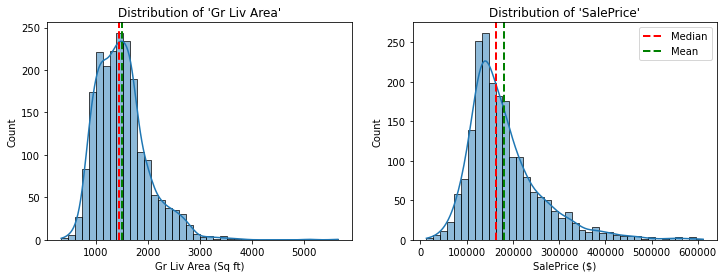

In [61]:
# distribution of Gr Liv Area & SalePrice is skewed to the right

fig, ax = plt.subplots(figsize=(12,4), ncols=2)
sns.histplot(data=train, x='living_area_sqft',bins=40, kde=True, ax=ax[0])
ax[0].axvline(train.loc[:,'living_area_sqft'].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
ax[0].axvline(train.loc[:,'living_area_sqft'].mean(), color='green', linestyle='dashed', linewidth=2, label='Mean')
ax[0].set_title('Distribution of \'Gr Liv Area\'', fontsize=12)
ax[0].set_xlabel('Gr Liv Area (Sq ft)')

sns.histplot(data=train, x='price',bins=40, kde=True, ax=ax[1])
ax[1].axvline(train.loc[:,'price'].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
ax[1].axvline(train.loc[:,'price'].mean(), color='green', linestyle='dashed', linewidth=2, label='Mean')
ax[1].set_title('Distribution of \'SalePrice\'', fontsize=12)
ax[1].set_xlabel('SalePrice ($)')
plt.legend()
plt.show()

In [ ]:
sns.pairplot(train, y_vars='price', x_vars=train._get_numeric_data().columns.sort_values()[range(0, 5)]);
sns.pairplot(train, y_vars='price', x_vars=train._get_numeric_data().columns.sort_values()[range(5, 10)]);

In [ ]:
sns.pairplot(train, y_vars='SalePrice', x_vars=train._get_numeric_data().columns.sort_values()[range(10, 15)]);
sns.pairplot(train, y_vars='SalePrice', x_vars=train._get_numeric_data().columns.sort_values()[range(15, 20)]);

In [ ]:
sns.pairplot(train, y_vars='SalePrice', x_vars=train._get_numeric_data().columns.sort_values()[range(20, 25)]);
sns.pairplot(train, y_vars='SalePrice', x_vars=train._get_numeric_data().columns.sort_values()[range(25, 30)]);

In [ ]:
plt.figure(figsize=(12,6))
g = sns.regplot(data=train, x='living_area_sqft', y='price', 
                scatter_kws={'alpha': 0.4}, 
                line_kws={'color': 'green','linewidth':0.8})
plt.xlabel(xlabel='Gr Liv Area (Sq ft)')
plt.ylabel(ylabel='SalePrice ($)')
plt.title(label='Scatterplot of Gr Liv Area vs SalePrice')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
g = sns.regplot(data=train, x='quality_rating', y='price', 
                scatter_kws={'alpha': 0.4}, 
                line_kws={'color': 'green','linewidth':0.8})
plt.xlabel(xlabel='Gr Liv Area (Sq ft)')
plt.ylabel(ylabel='SalePrice ($)')
plt.title(label='Scatterplot of Gr Liv Area vs SalePrice')
plt.show()

Linear Regression

In [ ]:
lr = LinearRegression()

In [ ]:
features = features = [col for col in better_cols if col != 'price']
features

In [ ]:
X = train[features]
y = train['price']

In [ ]:
y.head()

In [ ]:
poly = PolynomialFeatures(include_bias=False)